In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter, firwin
from scipy.fftpack import fft,fftshift
from scipy import signal
from tool._fixedInt import *
from random import *


# <u> Filter analysis and testbench stimulus generation <u>

## Frequency response

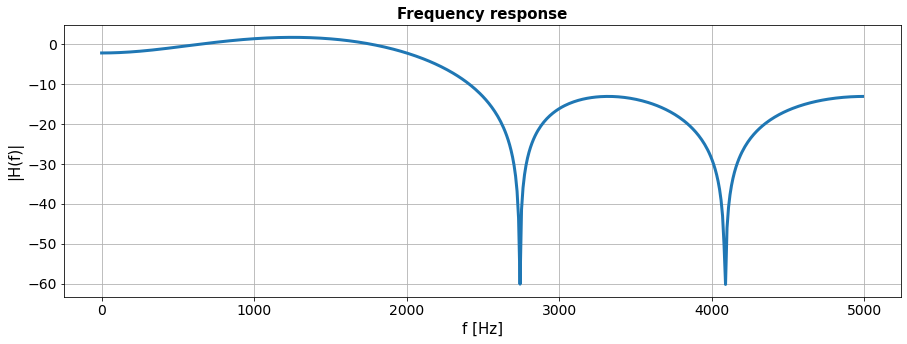

In [2]:
fs = 10000     # 10kHz 
b=[-0.0456, -0.1703, 0.0696, 0.3094, 0.4521, 0.3094, 0.0696, -0.1703, -0.0456]
w, h = signal.freqz(b=b, a=1)
x = w*fs*1/(2*np.pi)
y = 20*np.log10(abs(h))

plt.figure(figsize=(15,5))
plt.plot(x,y, linewidth=3)
plt.title("Frequency response", fontweight="bold", fontsize=15)
plt.xlabel("f [Hz]", fontsize=15)
plt.ylabel("|H(f)|", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

## Input signal generation

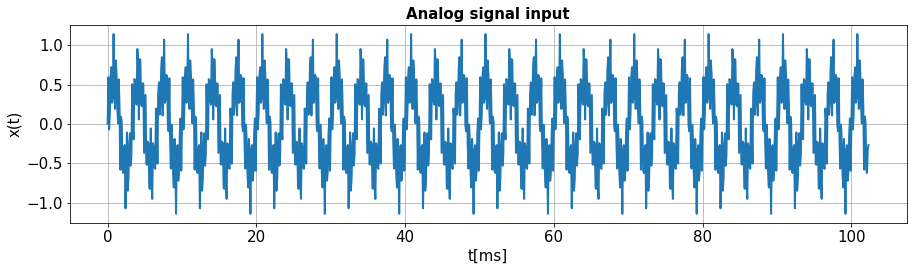

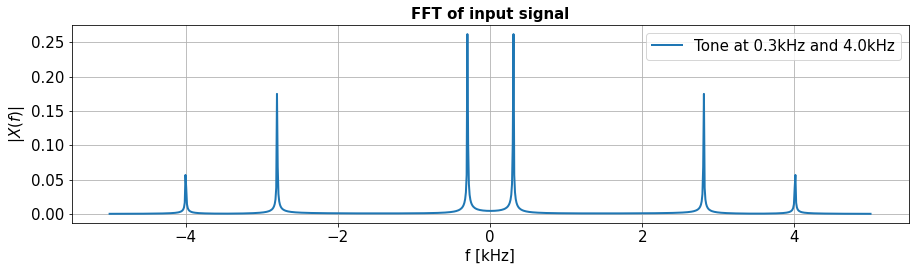

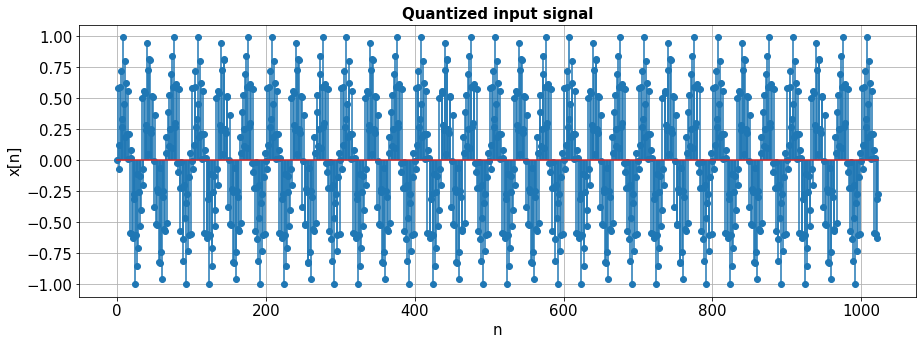

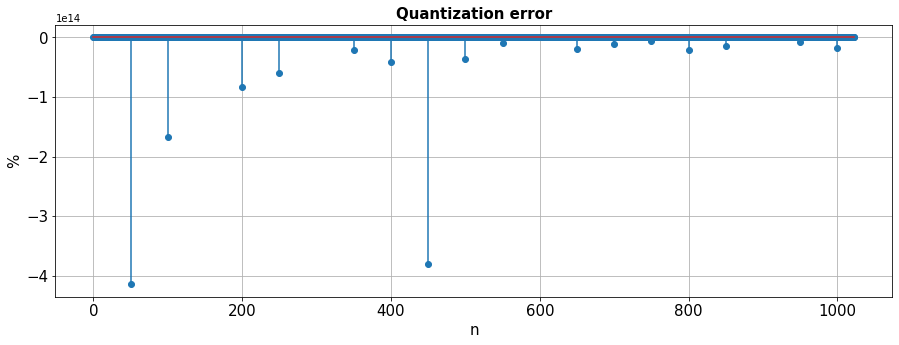

In [4]:
f1 = 300        # 300Hz
f2 = 4000       # 4kHz
f3 = 2800       # 2.5kHz
N  = 1024       # 5000 samples
Ts = 1/fs
NFFT = 1024
t = np.arange(N)*Ts
f = np.linspace(-fs/2, fs/2, NFFT)
n = np.arange(0,len(t))

x = 0.6*np.sin(2*np.pi*f1*t) + 0.15*np.sin(2*np.pi*f2*t) + 0.4*np.sin(2*np.pi*f3*t)

X = fft(x, NFFT)
X = fftshift(X)

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(t/1e-3,x, linewidth=2)
plt.title("Analog signal input", fontsize=15, fontweight="bold")
plt.xlabel("t[ms]", fontsize=15)
plt.ylabel("x(t)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.plot(f/1e3,1/NFFT*np.abs(X), linewidth=2, label=f"Tone at {f1/1e3}kHz and {f2/1e3}kHz")
plt.title("FFT of input signal", fontsize=15, fontweight="bold")
plt.xlabel("f [kHz]", fontsize=15)
plt.ylabel("$|X(f)|$", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.grid(True)

# Cuantización
NB_DATA  = 8
NBF_DATA = 7
xn = arrayFixedInt(NB_DATA, NBF_DATA, x)
xn_fix = [i.fValue for i in xn]
diff = np.subtract(x, xn_fix)
error = np.divide(diff, x, where=x!=0)*100


plt.figure(figsize=(15,5))
plt.stem(n, xn_fix)
plt.title("Quantized input signal", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("x[n]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)


plt.figure(figsize=(15,5))
plt.stem(n,error)
plt.title("Quantization error", fontsize=15, fontweight="bold")
plt.xlabel("n", fontsize=15)
plt.ylabel("%", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

input_sig = open("input.mem","w")
for i in xn:
    input_sig.write(f"0x{i.__hex__()}\n")
input_sig.close()

## <u> Signal filtering </u>

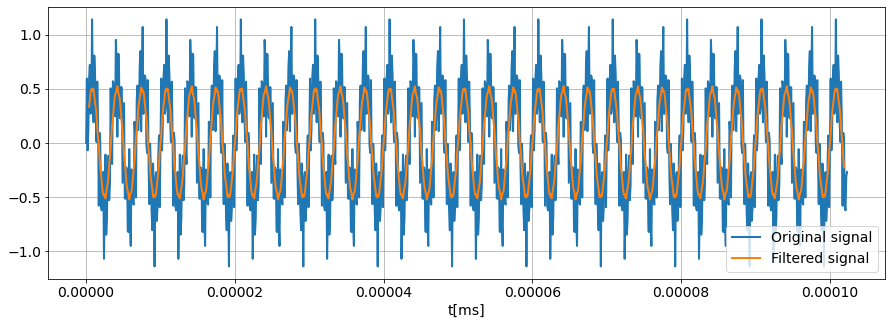

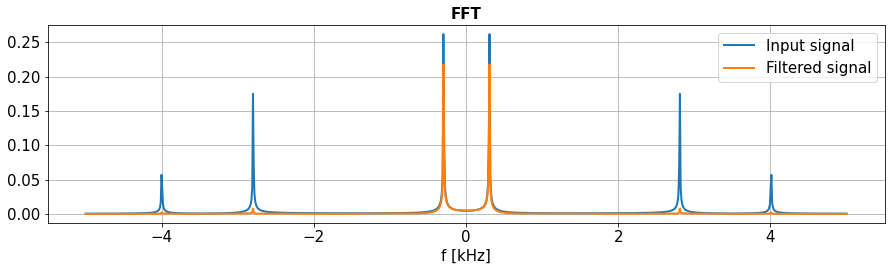

In [5]:
# The first N-1 samples are corrupted
warmup = len(b)-1
delay = warmup/2*Ts

x_filtered = lfilter(b, 1, x)

plt.figure(figsize=(15,5))
plt.plot(t/1e3,x, linewidth=2, label="Original signal")
plt.plot((t[warmup:]-delay)/1e3,x_filtered[warmup:], linewidth=2, label="Filtered signal")
plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel("t[ms]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

X_FILTERED = fft(x_filtered, NFFT)
X_FILTERED = fftshift(X_FILTERED)


plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(f/1e3,1/NFFT*np.abs(X), linewidth=2, label="Input signal")
plt.plot(f/1e3,1/NFFT*np.abs(X_FILTERED), linewidth=2, label="Filtered signal")
plt.title("FFT", fontsize=15, fontweight="bold")
plt.xlabel("f [kHz]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.grid(True)
